In [1]:
from transformers import ViTMAEConfig, ViTMAEModel


In [7]:
configuration = ViTMAEConfig()

In [8]:
configuration

ViTMAEConfig {
  "attention_probs_dropout_prob": 0.0,
  "decoder_hidden_size": 512,
  "decoder_intermediate_size": 2048,
  "decoder_num_attention_heads": 16,
  "decoder_num_hidden_layers": 8,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "mask_ratio": 0.75,
  "model_type": "vit_mae",
  "norm_pix_loss": false,
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.34.0"
}

In [9]:
model = ViTMAEModel(configuration)

In [10]:
model

ViTMAEModel(
  (embeddings): ViTMAEEmbeddings(
    (patch_embeddings): ViTMAEPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
  )
  (encoder): ViTMAEEncoder(
    (layer): ModuleList(
      (0): ViTMAELayer(
        (attention): ViTMAEAttention(
          (attention): ViTMAESelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): ViTMAESelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ViTMAEIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
          (intermediate_act_fn): GELUActivation()
        )
        (outpu

In [11]:
from transformers import AutoImageProcessor, ViTMAEModel
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

image_processor = AutoImageProcessor.from_pretrained("facebook/vit-mae-base")
model = ViTMAEModel.from_pretrained("facebook/vit-mae-base")

inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)
last_hidden_states = outputs.last_hidden_state



In [12]:
import matplotlib.pyplot as plt

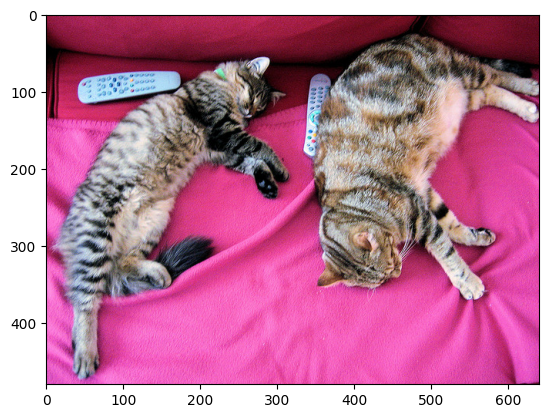

In [13]:
plt.imshow(image)

In [17]:
inputs['pixel_values'].shape

torch.Size([1, 3, 224, 224])

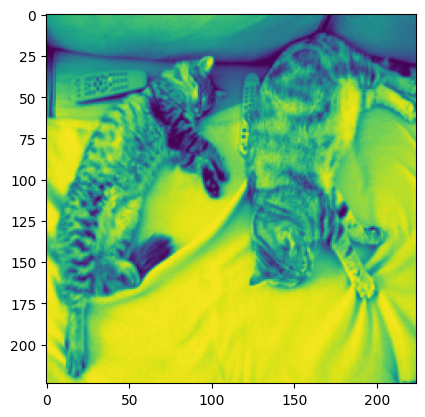

In [20]:
plt.imshow(inputs['pixel_values'][0][0])

In [21]:
outputs

ViTMAEModelOutput(last_hidden_state=tensor([[[-0.0478,  0.0673,  0.1037,  ..., -0.1582, -0.3615,  0.1048],
         [-0.1882, -0.0650, -0.1785,  ..., -0.1871, -0.1559, -0.2870],
         [-0.0490,  0.0285, -0.0366,  ..., -0.2808, -0.4164,  0.1469],
         ...,
         [-0.2528,  0.1360, -0.1162,  ..., -0.0987, -0.3509, -0.0812],
         [-0.1574,  0.1844, -0.0172,  ..., -0.3040, -0.2288, -0.4250],
         [ 0.2257, -0.1962,  0.0715,  ..., -0.2656, -0.1595,  0.1133]]],
       grad_fn=<NativeLayerNormBackward0>), mask=tensor([[1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
         1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
         1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
         1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1.,

In [22]:
last_hidden_states = outputs.last_hidden_state


In [24]:
last_hidden_states.shape

torch.Size([1, 50, 768])

In [25]:
from transformers import AutoImageProcessor, ViTMAEForPreTraining
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

image_processor = AutoImageProcessor.from_pretrained("facebook/vit-mae-base")
model = ViTMAEForPreTraining.from_pretrained("facebook/vit-mae-base")

inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)
loss = outputs.loss
mask = outputs.mask
ids_restore = outputs.ids_restore

In [28]:
outputs.logits.shape

torch.Size([1, 196, 768])

In [29]:
loss

tensor(0.3101, grad_fn=<DivBackward0>)

In [31]:
mask.shape

torch.Size([1, 196])

In [34]:
inputs['pixel_values'].shape

torch.Size([1, 3, 224, 224])

In [37]:
outputs.logits.shape

torch.Size([1, 196, 768])

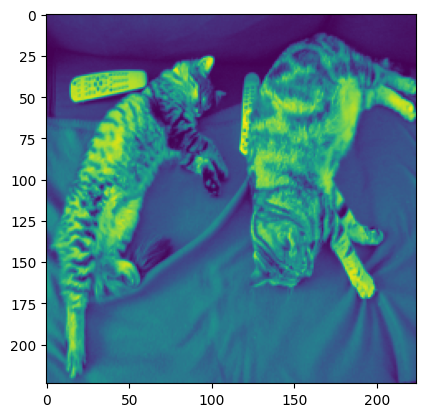

In [39]:
plt.imshow(inputs['pixel_values'][0][1])
plt.show()